# Importing all the dependencies

In [51]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Data Collection and Preprocessing

In [34]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes_data.csv')

In [35]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [36]:
data.shape

(768, 9)

In [37]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [39]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Extracting features and labels

In [40]:
x = data.drop(['Outcome'], axis=1).values
y = data['Outcome'].values

In [41]:
# Printing the shape of x and y
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [42]:
# Spliting the data into train data and Test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=24)

In [43]:
# Standardizing the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Training the model(support vector machine)


In [63]:
svc = SVC(kernel='linear')
model = svc.fit(x_train, y_train)

In [64]:
# Generating the prediction from the model on test data
y_pred = model.predict(x_test)

In [65]:
# Finding the accuracy of the model
np.mean(y_test == y_pred)

0.7467532467532467

# Generating accuracy_score, precision_score, recall_score, f1_score

In [66]:
pd.DataFrame({
    "Accuracy":[accuracy_score(y_test, y_pred, normalize=True)],
    'Precision':[precision_score(y_test, y_pred, average='macro')],
    'Recall':[recall_score(y_test, y_pred, average='macro')],
    'F1_score':[precision_score(y_test, y_pred, average='macro')]
})

,Accuracy,Precision,Recall,F1_score
0,0.746753,0.745378,0.686224,0.745378


In [48]:
# Displaying Confusion Matrix
con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[87, 11],
       [34, 22]])

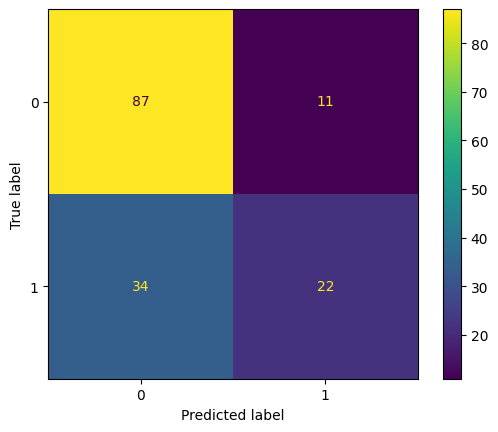

In [50]:
disp = ConfusionMatrixDisplay(con_mat, display_labels=[0,1])
disp.plot()

# Using Grid Search Cross Validation for improvement of the model

In [82]:
# help(SVC)

In [56]:
x = sc.fit_transform(x)


In [57]:
k = 5
cv = KFold(k, shuffle=True, random_state=42)
params = {
'C':[0.01, 0.1, 1,2,3,4,5,10,20,50,100], 'kernel':['linear', 'rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}
Grids = GridSearchCV(svc, params, n_jobs=-1, cv=cv)
model_gs = Grids.fit(x, y)
model_gs.best_params_

{'C': 4, 'gamma': 0.01, 'kernel': 'rbf'}

In [58]:
y_pred_gs = model_gs.predict(x_test)

In [59]:
np.mean(y_pred_gs == y_test)

0.7337662337662337

# Making a Predictive system

In [93]:
# Getting the input data for prediction
input_data = [1,85,66,29,0,26.6,0.351,31]


# making the test data as array and reshape into 2d form
input_data = np.array(input_data).reshape(1,-1)


# standardizing the input data
input_data = sc.transform(input_data)

# Getting Prediction from the input data
pred = model.predict(input_data.reshape(1,-1))

print(pred)


if pred[0] == 0:
  print('Patient is not Diabetic')
elif pred[0] == 1:
  print('Patient is Diabetic')

[0]
Patient is not Diabetic
